# 📊 Exploración de Datos - Análisis de Sentimientos

Este notebook realiza la exploración inicial del dataset de sentiment analysis.

## Objetivos:
- Cargar y explorar el dataset
- Analizar la distribución de sentimientos
- Identificar características del texto
- Detectar posibles problemas en los datos

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 1. Descarga del Dataset

Primero descargamos el dataset Sentiment140 desde Kaggle o usamos un dataset alternativo.

In [ ]:
# Función para descargar dataset de ejemplo
import requests
import io

def download_sample_dataset():
    """
    Descarga un dataset de ejemplo o crea uno sintético para pruebas
    """
    # Si no tienes el dataset real, podemos crear uno sintético
    # para probar el código
    
    sample_data = {
        'sentiment': [0, 4, 0, 4, 0, 4, 2, 0, 4, 2] * 100,  # 0=neg, 2=neutral, 4=pos
        'text': [
            'I hate this movie, it was terrible',
            'Amazing film! Loved every minute of it',
            'Worst experience ever, very disappointed',
            'Fantastic! Best movie I have seen this year',
            'This is bad, would not recommend',
            'Excellent quality, highly recommend',
            'It was okay, nothing special',
            'Boring and predictable plot',
            'Outstanding performance by all actors',
            'Average movie, not bad not good'
        ] * 100
    }
    
    return pd.DataFrame(sample_data)

# Cargar dataset
try:
    # Intentar cargar dataset real
    df = pd.read_csv('../data/sentiment140.csv', 
                     names=['sentiment', 'id', 'date', 'query', 'user', 'text'],
                     encoding='latin-1')
    print("✅ Dataset real cargado")
except:
    # Usar dataset sintético para pruebas
    df = download_sample_dataset()
    print("⚠️  Usando dataset sintético para pruebas")
    print("💡 Para usar datos reales, descarga el dataset y colócalo en ../data/")

print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

⚠️  Usando dataset sintético para pruebas
💡 Para usar datos reales, descarga el dataset y colócalo en ../data/
📊 Dataset cargado: 1000 filas, 2 columnas


## 2. Exploración Inicial

In [ ]:
# Información básica del dataset
print("=== INFORMACIÓN BÁSICA ===")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\n=== PRIMERAS FILAS ===")
display(df.head(10))

print("\n=== INFORMACIÓN DETALLADA ===")
print(df.info())

print("\n=== VALORES NULOS ===")
print(df.isnull().sum())

=== INFORMACIÓN BÁSICA ===
Forma del dataset: (1000, 2)
Columnas: ['sentiment', 'text']

=== PRIMERAS FILAS ===


,sentiment,text
0,0,"I hate this movie, it was terrible"
1,4,Amazing film! Loved every minute of it
2,0,"Worst experience ever, very disappointed"
3,4,Fantastic! Best movie I have seen this year
4,0,"This is bad, would not recommend"
5,4,"Excellent quality, highly recommend"
6,2,"It was okay, nothing special"
7,0,Boring and predictable plot
8,4,Outstanding performance by all actors
9,2,"Average movie, not bad not good"



=== INFORMACIÓN DETALLADA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1000 non-null   int64 
 1   text       1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

=== VALORES NULOS ===
sentiment    0
text         0
dtype: int64


In [ ]:
# Análisis de sentimientos
print("=== DISTRIBUCIÓN DE SENTIMIENTOS ===")
sentiment_counts = df['sentiment'].value_counts().sort_index()
print(sentiment_counts)

# Mapear sentimientos a etiquetas
sentiment_map = {0: 'Negativo', 2: 'Neutral', 4: 'Positivo'}
df['sentiment_label'] = df['sentiment'].map(sentiment_map)

print("\n=== DISTRIBUCIÓN CON ETIQUETAS ===")
label_counts = df['sentiment_label'].value_counts()
print(label_counts)

# Porcentajes
print("\n=== PORCENTAJES ===")
percentages = df['sentiment_label'].value_counts(normalize=True) * 100
print(percentages.round(2))

=== DISTRIBUCIÓN DE SENTIMIENTOS ===
sentiment
0    400
2    200
4    400
Name: count, dtype: int64

=== DISTRIBUCIÓN CON ETIQUETAS ===
sentiment_label
Negativo    400
Positivo    400
Neutral     200
Name: count, dtype: int64

=== PORCENTAJES ===
sentiment_label
Negativo    40.0
Positivo    40.0
Neutral     20.0
Name: proportion, dtype: float64


## 3. Visualizaciones

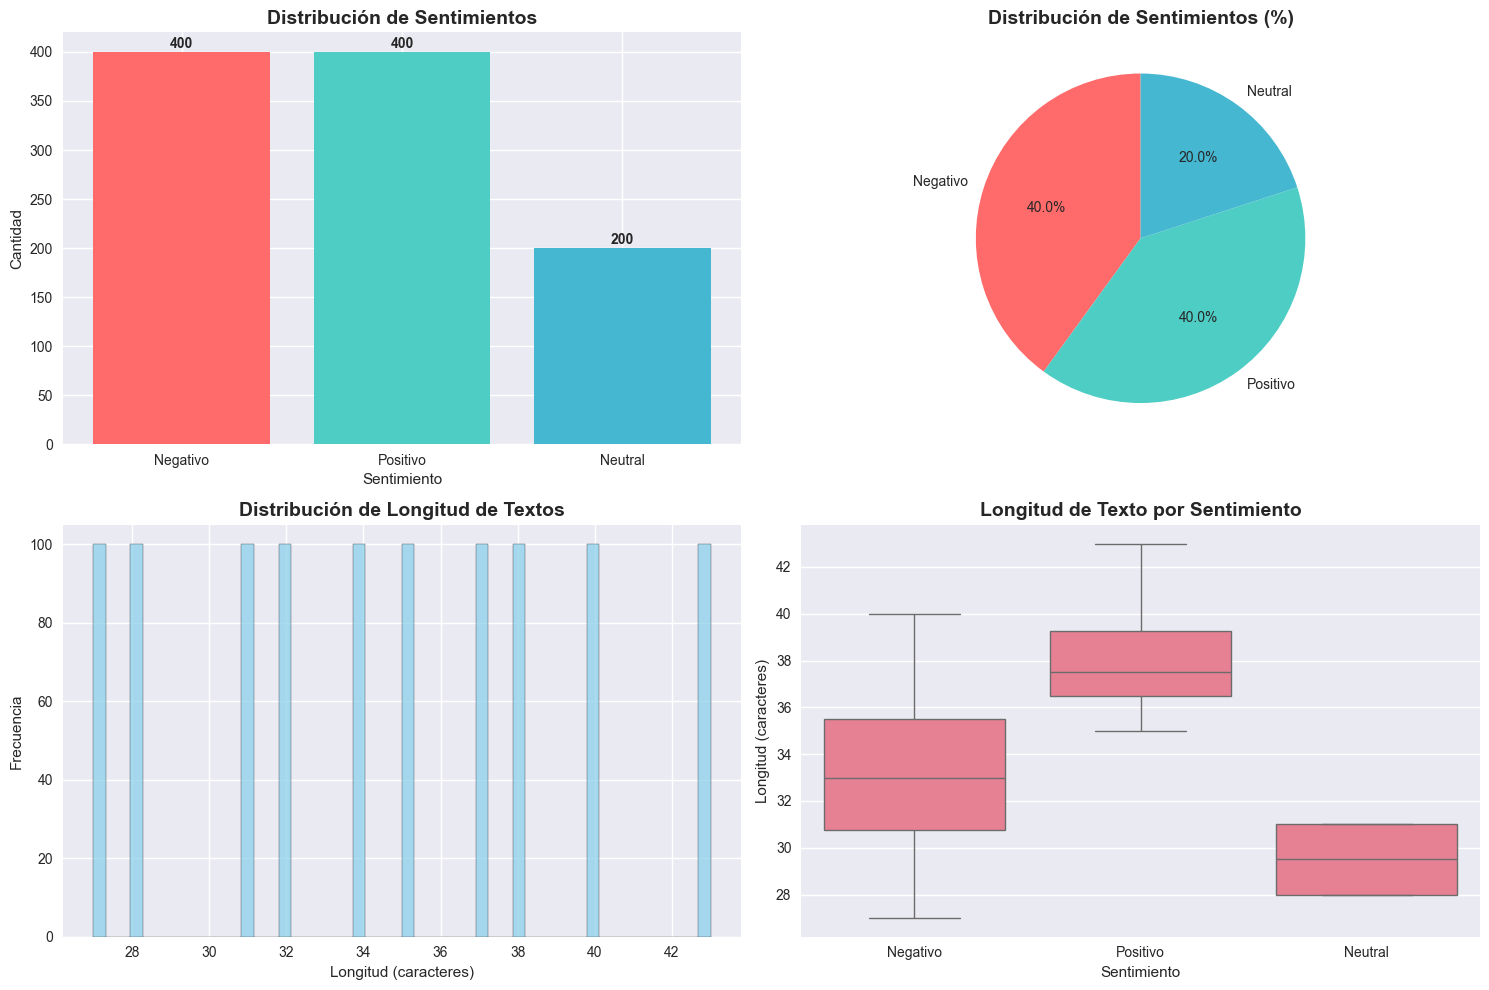

In [ ]:
# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución de sentimientos (barras)
sentiment_counts = df['sentiment_label'].value_counts()
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, 
               color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
axes[0, 0].set_title('Distribución de Sentimientos', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sentimiento')
axes[0, 0].set_ylabel('Cantidad')
for i, v in enumerate(sentiment_counts.values):
    axes[0, 0].text(i, v + max(sentiment_counts.values)*0.01, str(v), 
                   ha='center', fontweight='bold')

# 2. Distribución de sentimientos (pie)
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']
axes[0, 1].pie(sentiment_counts.values, labels=sentiment_counts.index, 
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Distribución de Sentimientos (%)', fontsize=14, fontweight='bold')

# 3. Longitud de textos
df['text_length'] = df['text'].str.len()
axes[1, 0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribución de Longitud de Textos', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Longitud (caracteres)')
axes[1, 0].set_ylabel('Frecuencia')

# 4. Longitud por sentimiento
sns.boxplot(data=df, x='sentiment_label', y='text_length', ax=axes[1, 1])
axes[1, 1].set_title('Longitud de Texto por Sentimiento', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sentimiento')
axes[1, 1].set_ylabel('Longitud (caracteres)')

plt.tight_layout()
plt.show()

## 4. Análisis de Texto

In [ ]:
# Estadísticas de texto
print("=== ESTADÍSTICAS DE TEXTO ===")
print(f"Longitud promedio: {df['text_length'].mean():.2f} caracteres")
print(f"Longitud mediana: {df['text_length'].median():.2f} caracteres")
print(f"Longitud mínima: {df['text_length'].min()} caracteres")
print(f"Longitud máxima: {df['text_length'].max()} caracteres")

# Número de palabras
df['word_count'] = df['text'].str.split().str.len()
print(f"\nPalabras promedio: {df['word_count'].mean():.2f}")
print(f"Palabras mediana: {df['word_count'].median():.2f}")

# Estadísticas por sentimiento
print("\n=== ESTADÍSTICAS POR SENTIMIENTO ===")
stats_by_sentiment = df.groupby('sentiment_label').agg({
    'text_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std']
}).round(2)

print(stats_by_sentiment)

=== ESTADÍSTICAS DE TEXTO ===
Longitud promedio: 34.50 caracteres
Longitud mediana: 34.50 caracteres
Longitud mínima: 27 caracteres
Longitud máxima: 43 caracteres

Palabras promedio: 5.70
Palabras mediana: 5.50

=== ESTADÍSTICAS POR SENTIMIENTO ===
                text_length              word_count             
                       mean median   std       mean median   std
sentiment_label                                                 
Negativo              33.25   33.0  4.66        5.5    5.5  1.12
Neutral               29.50   29.5  1.50        5.5    5.5  0.50
Positivo              38.25   37.5  2.95        6.0    6.0  1.58


In [ ]:
# Ejemplos de cada sentimiento
print("=== EJEMPLOS DE TEXTOS ===")
for sentiment in ['Negativo', 'Neutral', 'Positivo']:
    if sentiment in df['sentiment_label'].values:
        print(f"\n🔸 {sentiment.upper()}:")
        examples = df[df['sentiment_label'] == sentiment]['text'].head(3)
        for i, text in enumerate(examples, 1):
            print(f"   {i}. {text[:100]}..." if len(text) > 100 else f"   {i}. {text}")

=== EJEMPLOS DE TEXTOS ===

🔸 NEGATIVO:
   1. I hate this movie, it was terrible
   2. Worst experience ever, very disappointed
   3. This is bad, would not recommend

🔸 NEUTRAL:
   1. It was okay, nothing special
   2. Average movie, not bad not good
   3. It was okay, nothing special

🔸 POSITIVO:
   1. Amazing film! Loved every minute of it
   2. Fantastic! Best movie I have seen this year
   3. Excellent quality, highly recommend


## 5. Detección de Problemas

In [ ]:
# Buscar problemas comunes
print("=== DETECCIÓN DE PROBLEMAS ===")

# Textos duplicados
duplicates = df['text'].duplicated().sum()
print(f"Textos duplicados: {duplicates}")

# Textos muy cortos
very_short = (df['text_length'] < 5).sum()
print(f"Textos muy cortos (<5 caracteres): {very_short}")

# Textos muy largos
very_long = (df['text_length'] > 500).sum()
print(f"Textos muy largos (>500 caracteres): {very_long}")

# Textos vacíos
empty_texts = df['text'].isna().sum()
print(f"Textos vacíos: {empty_texts}")

# Balance de clases
class_balance = df['sentiment_label'].value_counts(normalize=True) * 100
print(f"\nBalance de clases:")
for label, percentage in class_balance.items():
    print(f"  {label}: {percentage:.1f}%")

# Verificar desbalance
max_class = class_balance.max()
min_class = class_balance.min()
if max_class / min_class > 2:
    print(f"⚠️  Dataset desbalanceado: {max_class/min_class:.1f}x diferencia")
else:
    print("✅ Dataset relativamente balanceado")

=== DETECCIÓN DE PROBLEMAS ===
Textos duplicados: 990
Textos muy cortos (<5 caracteres): 0
Textos muy largos (>500 caracteres): 0
Textos vacíos: 0

Balance de clases:
  Negativo: 40.0%
  Positivo: 40.0%
  Neutral: 20.0%
✅ Dataset relativamente balanceado


## 6. Guardado de Datos Procesados

In [ ]:
# Guardar dataset procesado
import os
os.makedirs('../data', exist_ok=True)

# Seleccionar columnas relevantes
df_clean = df[['text', 'sentiment', 'sentiment_label', 'text_length', 'word_count']].copy()

# Guardar
df_clean.to_csv('../data/dataset_procesado.csv', index=False)
print(f"✅ Dataset procesado guardado: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")

# Resumen final
print("\n=== RESUMEN FINAL ===")
print(f"Total de textos: {len(df_clean):,}")
print(f"Sentimientos únicos: {df_clean['sentiment_label'].nunique()}")
print(f"Longitud promedio: {df_clean['text_length'].mean():.1f} caracteres")
print(f"Dataset listo para análisis NLP ✅")

✅ Dataset procesado guardado: 1000 filas, 5 columnas

=== RESUMEN FINAL ===
Total de textos: 1,000
Sentimientos únicos: 3
Longitud promedio: 34.5 caracteres
Dataset listo para análisis NLP ✅
